In [3]:
!pip install keras
!pip install tensorflow

In [96]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas_datareader as web

In [40]:
df = pd.read_csv('apple.csv',index_col="Date",parse_dates=True)


In [41]:
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,213.43,214.5000,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
2010-01-05,214.60,215.5900,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2010-01-06,214.38,215.2300,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0
2010-01-07,211.75,212.0000,209.05,210.58,17040400.0,0.0,1.0,27.212826,27.244955,26.865839,27.062465,119282800.0
2010-01-08,210.30,212.0000,209.06,211.98,15986100.0,0.0,1.0,27.026481,27.244955,26.867124,27.242385,111902700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,115.59,116.5200,115.59,116.52,14249484.0,0.0,1.0,114.162295,115.080808,114.162295,115.080808,14249484.0
2016-12-27,116.52,117.8000,116.49,117.26,18296855.0,0.0,1.0,115.080808,116.344998,115.051178,115.811668,18296855.0
2016-12-28,117.52,118.0166,116.20,116.76,20905892.0,0.0,1.0,116.068456,116.558923,114.764760,115.317843,20905892.0


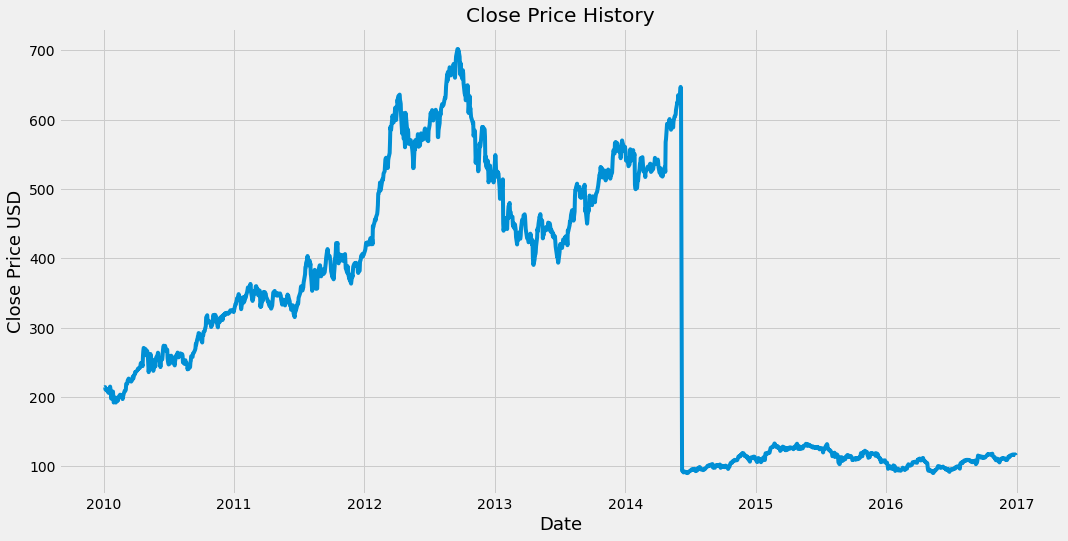

In [42]:
plt.figure(figsize = (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.show()

In [43]:
#Only Cose Column
data = df.filter(['Close'])
#Converting Data to numpy array
dataset = data.values
#Get the number of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1410

In [44]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.20223268],
       [0.20283744],
       [0.1972639 ],
       ...,
       [0.0432807 ],
       [0.04323167],
       [0.0417443 ]])

In [45]:
#Creating training dataset
train_data = scaled_data[0:training_data_len, :]
#Spiting dataset
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    


[array([0.20223268, 0.20283744, 0.1972639 , 0.19662646, 0.19891471,
       0.19585826, 0.19195188, 0.19674087, 0.19474682, 0.18902618,
       0.20391618, 0.19849792, 0.19252721, 0.17565624, 0.18435978,
       0.18904253, 0.19221993, 0.17817332, 0.16636102, 0.17072015,
       0.17256709, 0.17807525, 0.16633977, 0.17191331, 0.16972312,
       0.17310647, 0.17135105, 0.17715995, 0.17995489, 0.18489098,
       0.18350168, 0.18411951, 0.18206335, 0.18001373, 0.17452682,
       0.180406  , 0.18260273, 0.18688503, 0.19402766, 0.19379883,
       0.19458337, 0.19683894, 0.21030695, 0.21051943, 0.21695924,
       0.21993397, 0.22101272, 0.22281063, 0.2182995 , 0.21929653,
       0.21875715, 0.21962342, 0.21570053, 0.21978687, 0.22568729,
       0.22733811, 0.22289235, 0.22983884, 0.2322742 , 0.23792128])]
[0.23654015887025592]


In [46]:
#Converting dataset into numpy
x_train, y_train = np.array(x_train), np.array(y_train)
#Reshaping the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1350, 60, 1)

In [47]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [48]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [77]:
#Training
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1350/1350 [==============================] - 31s 23ms/step - loss: 9.0292e-04
Epoch 2/10
1350/1350 [==============================] - 30s 22ms/step - loss: 9.9957e-04
Epoch 3/10
1350/1350 [==============================] - 30s 23ms/step - loss: 9.6628e-04
Epoch 4/10
1350/1350 [==============================] - 31s 23ms/step - loss: 9.2616e-04
Epoch 5/10
1350/1350 [==============================] - 31s 23ms/step - loss: 8.9402e-04
Epoch 6/10
1350/1350 [==============================] - 31s 23ms/step - loss: 0.0010
Epoch 7/10
1350/1350 [==============================] - 31s 23ms/step - loss: 9.6924e-04
Epoch 8/10
1350/1350 [==============================] - 31s 23ms/step - loss: 9.4618e-04
Epoch 9/10
1350/1350 [==============================] - 31s 23ms/step - loss: 9.9507e-04
Epoch 10/10
1350/1350 [==============================] - 31s 23ms/step - loss: 9.0346e-04


In [78]:
#Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [79]:
#Converting datat to numpy array
x_test = np.array(x_test)
#Reshaping the data because data is 2D and STM wants 3D
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [80]:
#Predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [81]:
#RMSE for evauation
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.9055420216647059

In [87]:
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


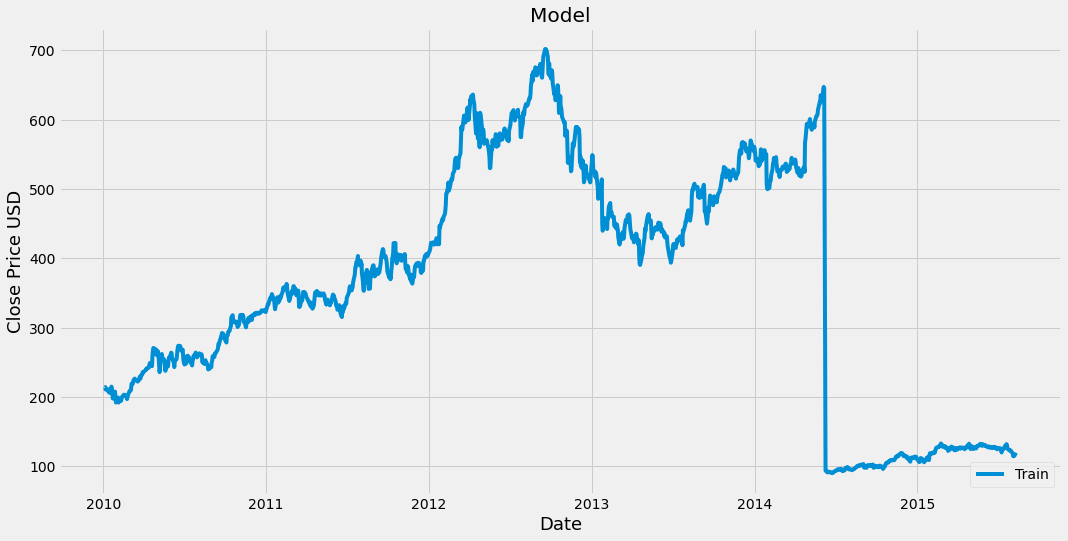

In [93]:
#Visualize Not working right. Wrong graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.plot(train['Close'])
#plt.plot(valid[['Close, Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [94]:
#Vaid and Predicted Prices
valid

,Close,Predictions
Date,,
2015-08-11,113.49,116.459862
2015-08-12,115.24,112.015739
2015-08-13,115.15,112.119865
2015-08-14,115.96,112.586250
2015-08-17,117.16,113.262924
...,...,...
2016-12-23,116.52,113.464577
2016-12-27,117.26,113.540909
2016-12-28,116.76,114.245461


In [103]:
from pandas_datareader import DataReader

In [104]:
appleq = web.Datareader('appl', data_source='yahoo', start='2012-01-01', end='2019-12-17')
new_df = appleq.filter(['Close'])
last_60days = new_df[-60:].values
last_60days_scaler = scaler.transform(last_60days)
X_test = []
X_test.append(last_60days_scaler)
x_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)